Algoritmos para modificar la tasa de aprendizaje
===

* *45 min* | Ultima modificación: Marzo 18, 2020

In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Definición del problema de optimización

Para demostrar diferentes estrategias de modificación de la tasa de aprendizaje se utilizará la siguiente función, la cual tiene un mínimo de aguja, tal como ilustra la gráfica presentada.

$$
f(x) =
\begin{cases}
    100\cdot (x-3)^2, & \text{si } |x-3| \le 0.2\\
    (x-3)^2+4,        & \text{de lo contrario}
\end{cases}
$$

In [2]:
def f(x):
    return np.where(
        abs(x - 3) <= 0.2, 10 * np.power( (x - 3), 2), np.power(x - 3, 2) + 4
    )

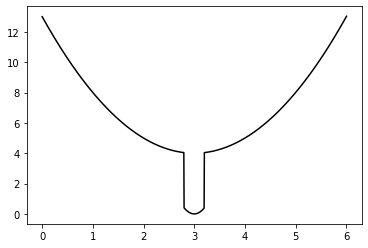

In [3]:
def plot_f():
    x_data = np.arange(0, 6.01, 0.005)
    y_data = f(x_data)
    plt.plot(x_data, y_data, "-k")


plot_f()

El gradiente de la función a optimizar es:

$$
\frac{d}{dx} f(x) =
\begin{cases}
    20 \cdot (x - 3), & \text{si } |x-3| \le 0.2\\
    2 \cdot (x - 3),  & \text{de lo contrario}
\end{cases}
$$

In [4]:
def grd(x):
    return np.where(abs(x - 3) <= 0.2, 20 * (x - 3), 2 * (x - 3))

## Tasa de aprendizaje constante

En esta estrategia, la tasa de aprendizaje ($\mu$) es constante durante todo el proceso.


Solución encontrada:
 x = 0.0840000000000014
 y = 12.503055999999992




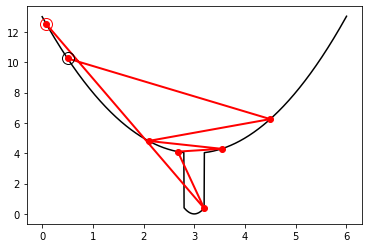

In [5]:
def learning_rate_constant(x, mu, t):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]

    for i in range(t):
        x = improve(x, mu)
        history_x.append(x)
        history_f.append(f(x))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    plot_f()
    plt.plot(history_x, history_f, "-or", linewidth=2)
    plt.plot(
        history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    )
    plt.plot(
        history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    )


learning_rate_constant(x=0.5, mu=0.8, t=6)


Solución encontrada:
 x = 0.550559999999995
 y = 9.999756313600024




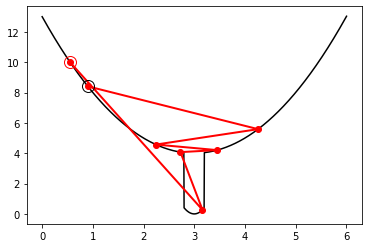

In [6]:
learning_rate_constant(x=0.9, mu=0.8, t=6)

## Escalado inverso de la tasa de aprendizaje

La tasa de aprendizaje disminuye a medida que se avanza hacia el mínimo, con el fin de poder entrar en la región de influencia del mínimo de aguja y encontra el punto óptimo.

$$\mu = \frac{\mu_0}{t^n}$$

0.8
0.565685424949238
0.46188021535170065
0.4
0.35777087639996635
0.32659863237109044
0.30237157840738177
0.282842712474619

Solución encontrada:
 x = 2.912299201706705
 y = 0.076914300212812




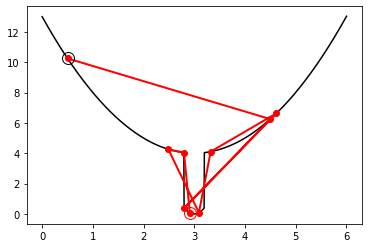

In [7]:
def learning_rate_invscaling(x, mu0, t, n):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]

    for i in range(t):
        mu = mu0 / (i + 1) ** n
        print(mu)
        x = improve(x, mu)
        history_x.append(x)
        history_f.append(f(x))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    plot_f()
    plt.plot(history_x, history_f, "-or", linewidth=2)
    plt.plot(
        history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    )
    plt.plot(
        history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    )
    plt.show()


learning_rate_invscaling(x=0.5, mu0=0.8, t=8, n=0.5)

## Estrategia adaptativa

En esta estrategia la tasa se mantiene constante durante cierto número de iteraciones. Cuando no se puede mejorar el punto actual, la tasa de aprendizaje es dividida por una constante $k$ y se continua con el proceso de optimización.

0.8
0.8
0.8
0.8
0.8
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.16
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032
0.032

Solución encontrada:
 x = 3.0032756144428485
 y = 0.00010729649978197806




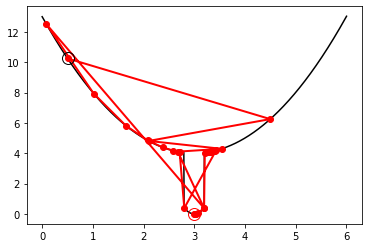

In [8]:
def learning_rate_adaptive(x, mu, t, k=5):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]

    for i in range(t):
        x = improve(x, mu)
        if f(x) > history_f[-1]:
            mu = mu / k
        print(mu)
        history_x.append(x)
        history_f.append(f(x))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    plot_f()
    plt.plot(history_x, history_f, "-or", linewidth=2)
    plt.plot(
        history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    )
    plt.plot(
        history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    )
    plt.show()


learning_rate_adaptive(x=0.5, mu=0.8, t=30, k=5)

## Estrategia óptima

Esta es otra estrategia para disminuir el valor de la tasa de aprendizaje en cada iteración del algoritmo.

$$\mu = \frac{1}{\alpha(t + t_0)}$$

$$t_0 = \frac{1}{\alpha \times \mu_0}$$

0.7407407407407408
0.6896551724137931
0.6451612903225807
0.606060606060606
0.5714285714285714
0.5405405405405405
0.5128205128205128
0.4878048780487804
0.46511627906976744

Solución encontrada:
 x = 2.9034450150314686
 y = 0.0932286512227333




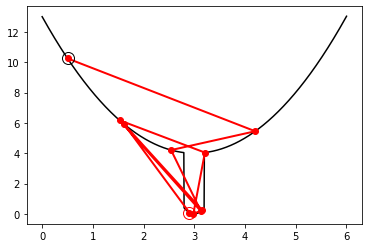

In [9]:
def learning_rate_optimal(x, mu0, t, alpha=0.001):
    def improve(x, mu):
        return x - mu * grd(x)

    history_x = [x]
    history_f = [f(x)]

    t0 = 1 / (alpha * mu0)

    for i in range(t):
        mu = 1 / (alpha * ((i + 1) + t0))
        x = improve(x, mu)
        print(mu)
        history_x.append(x)
        history_f.append(f(x))

    print("\nSolución encontrada:\n x = {}\n y = {}\n\n".format(x, f(x)))

    plot_f()
    plt.plot(history_x, history_f, "-or", linewidth=2)
    plt.plot(
        history_x[0], history_f[0], "o", color="black", fillstyle="none", markersize=12
    )
    plt.plot(
        history_x[-1], history_f[-1], "o", color="red", fillstyle="none", markersize=12
    )
    plt.show()


learning_rate_optimal(x=0.5, mu0=0.8, t=9, alpha=0.1)